<a href="https://colab.research.google.com/github/monirulhasan1996/SpamEmailClassification/blob/main/SpamEmailClassificationV1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing Dataset**

[Dataset](https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset/code?fbclid=IwAR0qFOS7CpBJWVMi2PNF4b_4Vlqiz4Jwdtc8muVAnuyMuK6hiUIlgjRWMFk)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/monirulhasan1996/SpamEmailClassification/main/dataset.csv')

In [ ]:
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


**Analysis of dataset**

In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
ham_df = df[df['spam'] == 0]
spam_df = df[df['spam'] == 1]

In [ ]:
ham_df

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [ ]:
print('Spam Percentage =',(len(spam_df)/len(df))*100,'%')
print('Ham Percentage =',(len(ham_df)/len(df))*100,'%')

Spam Percentage = 23.88268156424581 %
Ham Percentage = 76.11731843575419 %


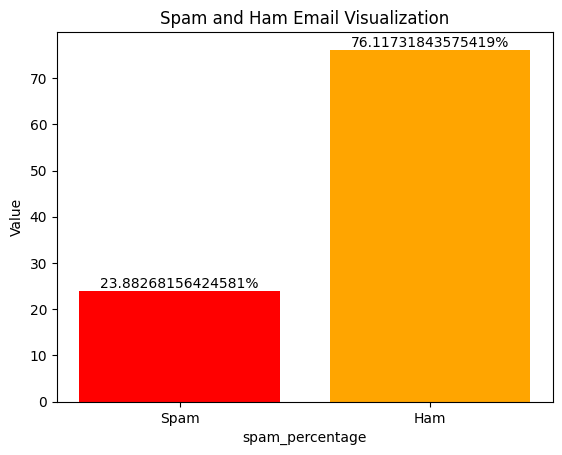

In [ ]:
# Data
spam_percentage = len(spam_df)/len(df)*100
ham_percentage = len(ham_df)/len(df)*100

# Labels for the bars
labels = ['Spam', 'Ham']

# Heights of the bars
heights = [spam_percentage, ham_percentage]

# Bar colors
colors = ['red', 'orange']

# Creating the bar chart
plt.bar(labels, heights, color=colors)

# Adding labels and title
plt.xlabel('spam_percentage')
plt.ylabel('Value')
plt.title('Spam and Ham Email Visualization')

# Displaying the percentage labels on top of each bar
for i in range(len(heights)):
    plt.text(i, heights[i], f'{heights[i]}%', ha='center', va='bottom')

# Displaying the chart
plt.show()


**Counting Spam and Ham Email in the Dataset**

In [ ]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

**Dropping duplicates**

In [ ]:
df.drop_duplicates(inplace = True)

**Checking Missing Data**

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

**Separating Spam and Not Spam**

In [ ]:
x = df.text.values
y = df.spam.values

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

**Data Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**ML Algorithm(Naive Bias)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train, ytrain)

MultinomialNB()

In [ ]:
x_test = cv.transform(xtest)

In [ ]:
x_test.toarray()

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model.score(x_test, ytest)

0.9947322212467077

**Testing Accuracy for some Real Email**

In [ ]:
emails = ["hey, i'm looking for machine learning tutorial in bengali language", "Hey you win an iphone x giveway for free please send me your address to the survey"]

In [ ]:
cv_emails = cv.transform(emails)

In [ ]:
result = model.predict(cv_emails)
result

array([0, 1])

**Printing the result**

In [ ]:
index = 0
for i in result:
  email = emails[index];
  status = "Spam" if (i == 1) else "Ham(Not Spam)"
  print("Classified as->", status, "\n Email:", email)
  index += 1

Classified as-> Ham(Not Spam) 
 Email: hey, i'm looking for machine learning tutorial in bengali language
Classified as-> Spam 
 Email: Hey you win an iphone x giveway for free please send me your address to the survey


**Testing with real dataset (real_dataset.csv)**

In [ ]:
DATA = pd.read_csv('https://raw.githubusercontent.com/monirulhasan1996/SpamEmailClassification/main/real_dataset.csv')

In [ ]:
print(DATA)

     IsSpam                                               Text
0         0  key issues going forwarda year end reviews rep...
1         0  california update davis transmission deal esse...
2         0  california executive summary bottom line qfs b...
3         0   fix bill fails may taken againabx the emergen...
4         0   out interestthis more than you ever wanted kn...
..      ...                                                ...
132       1  top quality pills heresextet quiz contralatera...
133       1                      want watch http vwk afeet com
134       1   utf many drugs utf per draught have you any t...
135       1   klno health suite good day the right prices a...
136       1  unfeigned alilum ciall ambiien aagrra xaanax c...

[137 rows x 2 columns]


In [ ]:
XDATA = cv.transform(DATA['Text'])
YDATA = DATA['IsSpam']

In [ ]:
# real dataset score (accuracy ~ 94%)
naive_acc = model.score(XDATA, YDATA)

0.948905109489051

** ML Algorithm (Support Vector Machine)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])


In [ ]:
y_pred_SVM = clf_svm.predict(X_test)

In [ ]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

# 0.9834888729361091

**ML Algorithm (KNN)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
clf_knn.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

y_pred_KNN=clf_knn.predict(X_test)


knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

# 0.9188801148600143


**Comparison**

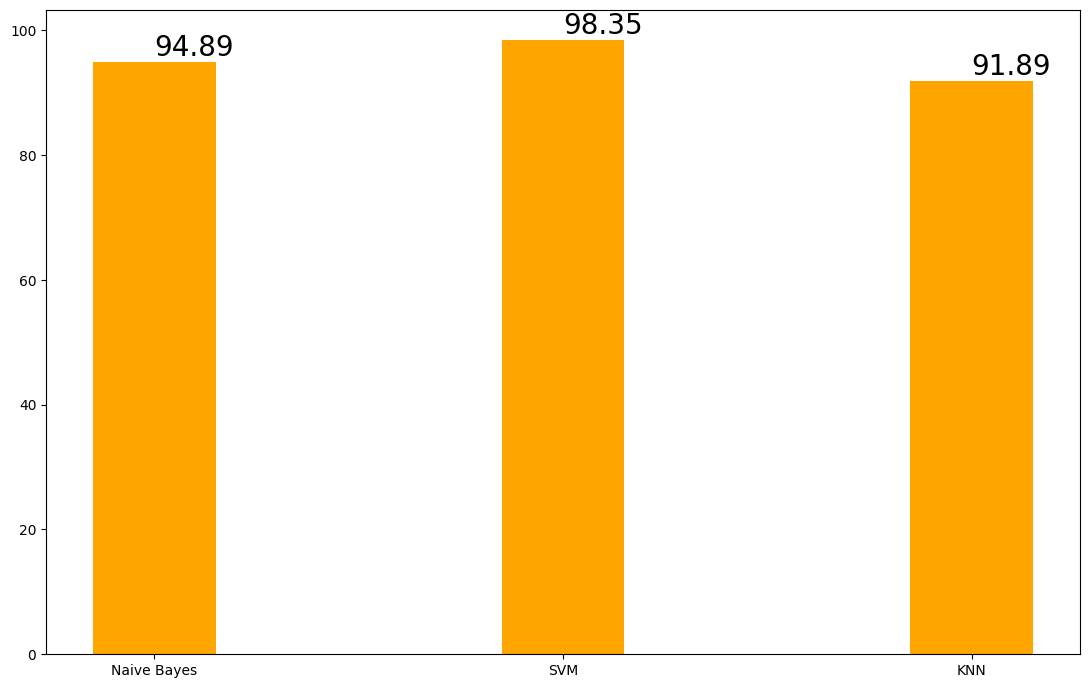

In [ ]:
menMeans = np.array([naive_acc,svm_acc,knn_acc])*100
ind = ['Naive Bayes','SVM','KNN']
fig, ax = plt.subplots(figsize = (11,7))
ax.bar(ind,menMeans,width=0.3,color ='orange')
for index, data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

# -- The End --

